In [1]:
#%matplotlib inline
import pandas as pd

pd.options.display.max_columns = None
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import json

In [2]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,bond_change_encode_forward,bond_change_encode_backward
0,0,Mg,0.481830,0.135878,0.413891,-920.683419,-920.547541,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,0,Mg,0.345952,-0.135878,0.413891,-920.547541,-920.683419,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,1,Al,0.728938,0.107344,0.675266,-920.683419,-920.576074,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0..."
3,1,Al,0.621594,-0.107344,0.675266,-920.576074,-920.683419,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0..."
4,2,Al,0.782146,0.154622,0.704835,-920.683419,-920.528797,"[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1361.0, 149.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4887,2443,Zn,0.326963,-0.029010,0.341468,-922.041633,-922.070643,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","[1382.0, 0.0, 141.0, 0.0, 0.0, 1.0, 706.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[0.0, 0.0, 1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -3.0...","[0.0, 0.0, -1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0,..."
4888,2444,Al,0.569094,0.049230,0.544478,-922.070643,-922.021413,"[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1380.0, 0.0, 144.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[-2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[2.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4889,2444,Al,0.519863,-0.049230,0.544478,-922.021413,-922.070643,"[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 0.0, 0.0, ...","[1380.0, 0.0, 144.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[2.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4890,2445,Al,0.552314,0.053045,0.525792,-922.070643,-922.017599,"[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[0.75, 0.0, 0.25, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0...","[1382.0, 0.0, 142.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[1381.0, 0.0, 143.0, 0.0, 0.0, 0.0, 706.0, 0.0...","[-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


In [3]:
df.describe()

,index,migration_barriers,energy_difference,e0,energy_start,energy_end
count,4892.0000,4892.000000,4892.000000,4892.000000,4892.000000,4892.000000
mean,1222.5000,0.499809,0.000000,0.499809,-894.243907,-894.243907
std,706.1715,0.206304,0.097687,0.200439,32.971650,32.971650
min,0.0000,-0.044152,-0.485086,-0.022076,-950.776122,-950.776122
25%,611.0000,0.382736,-0.056991,0.384449,-918.260210,-918.260210
50%,1222.5000,0.506474,0.000000,0.503933,-899.789770,-899.789770
75%,1834.0000,0.594659,0.056991,0.586361,-875.351591,-875.351591
max,2445.0000,4.607260,0.485086,4.547388,-801.581643,-801.581643


In [31]:
df = pd.read_pickle('../data/processed/linear_regression.pkl')
DIMENSION_E0 = len(df.at[0, 'one_hot_encode_forward'])
DIMENSION_E = len(df.at[0, 'energy_encode_start'])

# df = df[556*2:2260]
df = df[:2260]
df = df[df['migration_barriers'] < 1.1]
df[((df['energy_difference'] - df['energy_difference'].mean()) / df['energy_difference'].std()).abs() < 2]
df[((df['migration_barriers'] - df['migration_barriers'].mean()) / df['migration_barriers'].std()).abs() < 2]
print(f'Dimensionality {DIMENSION_E0} {DIMENSION_E}')
df

Dimensionality 1521 42


,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,bond_change_encode_forward,bond_change_encode_backward
0,0,Mg,0.481830,0.135878,0.413891,-920.683419,-920.547541,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,0,Mg,0.345952,-0.135878,0.413891,-920.547541,-920.683419,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 145.0, 0.0, 17.0, 0.0, 0.0, 696.0, 45...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,1,Al,0.728938,0.107344,0.675266,-920.683419,-920.576074,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0..."
3,1,Al,0.621594,-0.107344,0.675266,-920.576074,-920.683419,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1363.0, 147.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0..."
4,2,Al,0.782146,0.154622,0.704835,-920.683419,-920.528797,"[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[1361.0, 149.0, 0.0, 14.0, 0.0, 0.0, 693.0, 48...","[-1.0, 1.0, 0.0, 0.0, 0.0, 0.0, -3.0, 3.0, 0.0...","[1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 3.0, -3.0, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255,1127,Zn,0.242831,-0.064467,0.275064,-918.902771,-918.967238,"[0.5, 0.0, 0.5, 0.25, 0.0, 0.75, 0.0, 0.0, 1.0...","[0.5, 0.0, 0.5, 0.25, 0.0, 0.75, 0.0, 0.0, 1.0...","[1375.0, 0.0, 134.0, 0.0, 0.0, 15.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[0.0, 0.0, 2.0, 0.0, 0.0, -2.0, 0.0, 0.0, -2.0...","[0.0, 0.0, -2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 2.0,..."
2256,1128,Zn,0.266368,0.008176,0.262280,-918.967238,-918.959061,"[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2257,1128,Zn,0.258192,-0.008176,0.262280,-918.959061,-918.967238,"[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[0.25, 0.0, 0.75, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2258,1129,Al,0.543555,0.108872,0.489119,-918.967238,-918.858366,"[0.5, 0.0, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.0, 0.5, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[1375.0, 0.0, 136.0, 0.0, 0.0, 13.0, 688.0, 0....","[1373.0, 0.0, 138.0, 0.0, 0.0, 13.0, 689.0, 0....","[-2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, -1.0...","[2.0, 0.0, -2.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0..."


In [5]:
df.describe()

,index,migration_barriers,energy_difference,e0,energy_start,energy_end
count,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000,2246.000000
mean,565.467943,0.480934,-0.000335,0.481101,-891.059308,-891.059643
std,326.527643,0.178687,0.106046,0.171184,35.198720,35.198688
min,0.000000,0.001193,-0.485086,0.049129,-950.776122,-950.776122
25%,283.000000,0.352730,-0.061298,0.355311,-918.114133,-918.114133
50%,566.000000,0.487223,-0.000006,0.482907,-898.534050,-898.534050
75%,848.750000,0.595407,0.060230,0.586978,-860.857526,-860.857526
max,1129.000000,1.077400,0.485086,1.150037,-801.581643,-801.581643


In [6]:
# a,b = np.stack(df['one_hot_encode_forward']), np.stack(df['one_hot_encode_backward'])
# (a-b)[3,:]

In [7]:
# np.linalg.norm(a-b)

In [8]:
df = df.sample(frac=1, random_state=0)
df_copy = df.drop_duplicates(subset=['migration_atom', 'energy_start'])
# df_copy = df

In [9]:
# TEST_SIZE = 100

# x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE]['energy_start'])

# df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

# x_train_Al, y_train_Al = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Mg, y_train_Mg = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# x_train_Zn, y_train_Zn = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])


# x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['energy_encode_start']), np.array(df_copy[:-TEST_SIZE:]['energy_start'])

# x_test_Al, y_test_Al = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Mg, y_test_Mg = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])
# x_test_Zn, y_test_Zn = np.stack(df_test['one_hot_encode_forward']), \
#                        np.array(df_test['e0'])

In [10]:
TEST_SIZE = 500

x_train, y_train = np.stack(df_copy[:-TEST_SIZE]['bond_change_encode_forward']), np.array(df_copy[:-TEST_SIZE]['energy_difference'])

df_train, df_test = df[:-TEST_SIZE], df[-TEST_SIZE:]

x_train_Al, y_train_Al = np.stack(df_train[df_train['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Al']['e0'])
x_train_Mg, y_train_Mg = np.stack(df_train[df_train['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Mg']['e0'])
x_train_Zn, y_train_Zn = np.stack(df_train[df_train['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                         np.array(df_train[df_train['migration_atom'] == 'Zn']['e0'])


x_test, y_test = np.stack(df_copy[-TEST_SIZE:]['bond_change_encode_forward']), np.array(df_copy[:-TEST_SIZE:]['energy_difference'])

x_test_Al, y_test_Al = np.stack(df_test[df_test['migration_atom'] == 'Al']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Al']['e0'])
x_test_Mg, y_test_Mg = np.stack(df_test[df_test['migration_atom'] == 'Mg']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Mg']['e0'])
x_test_Zn, y_test_Zn = np.stack(df_test[df_test['migration_atom'] == 'Zn']['one_hot_encode_forward']), \
                       np.array(df_test[df_test['migration_atom'] == 'Zn']['e0'])

In [11]:
print(x_train.shape)
print(x_train_Al.shape)
print(x_train_Mg.shape)
print(x_train_Zn.shape)

(1190, 42)
(863, 1521)
(419, 1521)
(464, 1521)


In [12]:
# plt.rcParams["font.family"] = "Times New Roman"
# from matplotlib import rc
# x_train, y_train = np.stack(df_train['one_hot_encode_forward']), \
#                          np.array(df_train['e0'])
# mu_x, mean_y = np.mean(x_train, axis=0), np.mean(y_train)
# covariance = np.cov(x_train, rowvar=False)
# U, S, Uh = np.linalg.svd(covariance)

In [13]:
mu_x_Al, mean_y_Al = np.mean(x_train_Al, axis=0), np.mean(y_train_Al)
mu_x_Mg, mean_y_Mg = np.mean(x_train_Mg, axis=0), np.mean(y_train_Mg)
mu_x_Zn, mean_y_Zn = np.mean(x_train_Zn, axis=0), np.mean(y_train_Zn)
mu_x, mean_y = np.mean(x_train, axis=0), np.mean(y_train)

covariance = np.cov(x_train, rowvar=False)
covariance_Al = np.cov(x_train_Al, rowvar=False)
covariance_Mg = np.cov(x_train_Mg, rowvar=False)
covariance_Zn = np.cov(x_train_Zn, rowvar=False)

U, S, Uh = np.linalg.svd(covariance)
U_Al, S_Al, Uh_Al = np.linalg.svd(covariance_Al)
U_Mg, S_Mg, Uh_Mg = np.linalg.svd(covariance_Mg)
U_Zn, S_Zn, Uh_Zn = np.linalg.svd(covariance_Zn)

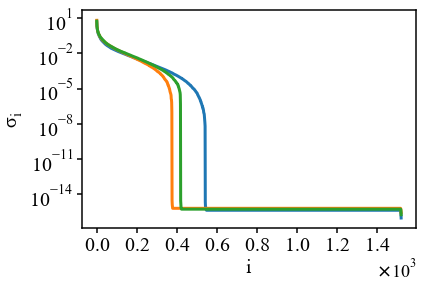

In [14]:
plt.rcParams["font.family"] = "Times New Roman"
from matplotlib import rc
fig, ax = plt.subplots()

ax.ticklabel_format(axis='both',style='sci', scilimits=(-2,2),useMathText=True)
ax.xaxis.get_offset_text().set_fontsize(18)
ax.yaxis.get_offset_text().set_fontsize(18)
ax.semilogy(np.arange(x_train_Al.shape[1]), S_Al, linewidth=3)
ax.semilogy(np.arange(x_train_Mg.shape[1]), S_Mg, linewidth=3)
ax.semilogy(np.arange(x_train_Zn.shape[1]), S_Zn, linewidth=3)

plt.yscale('log') 

ax.set_xlabel('$\mathregular{i}$', fontdict={'family' : 'Times New Roman', 'size':20})
ax.set_ylabel('$\mathregular{\sigma_i}$', fontdict={'family' : 'Times New Roman', 'size':20})
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
ax.xaxis.set_tick_params(width=1.5,length=5)
ax.yaxis.set_tick_params(width=1.5,length=5)
plt.savefig('svd.png', dpi=1000, bbox_inches="tight", transparent=True)


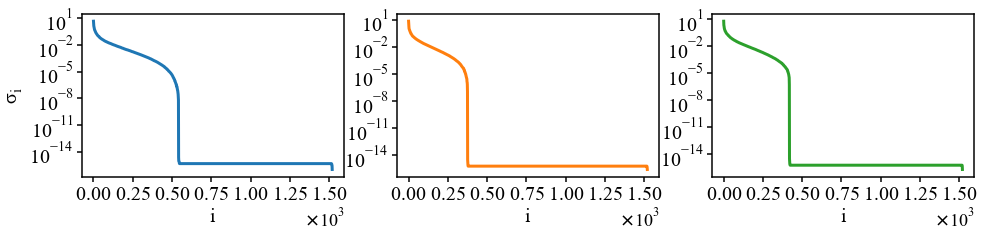

In [15]:
fig, axes = plt.subplots(1,3, figsize=(16, 3))

for ax in axes:
    ax.ticklabel_format(axis='both',style='sci', scilimits=(-2,2),useMathText=True)  
    ax.xaxis.get_offset_text().set_fontsize(18)
    ax.yaxis.get_offset_text().set_fontsize(18)

    
axes[0].semilogy(np.arange(x_train_Al.shape[1]), S_Al, linewidth=3, c='C0')
axes[1].semilogy(np.arange(x_train_Mg.shape[1]), S_Mg, linewidth=3, c='C1')
axes[2].semilogy(np.arange(x_train_Zn.shape[1]), S_Zn, linewidth=3, c='C2')

plt.yscale('log') 
axes[0].set_ylabel('$\mathregular{\sigma_i}$', fontdict={'family' : 'Times New Roman', 'size':20})

for ax in axes:

    ax.set_xlabel('$\mathregular{i}$', fontdict={'family' : 'Times New Roman', 'size':20})
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(1.5)
    ax.xaxis.set_tick_params(width=1.5,length=5)
    ax.yaxis.set_tick_params(width=1.5,length=5)
plt.savefig('svd.png', dpi=1000, bbox_inches="tight", transparent=True)

PCS Dimensionality Reduction
207 principal components are needed to represent 99% of the total variation
The percentage reduction in dimension is: 86.3905325443787%
PCS Dimensionality Reduction
176 principal components are needed to represent 99% of the total variation
The percentage reduction in dimension is: 88.42866535174227%
PCS Dimensionality Reduction
197 principal components are needed to represent 99% of the total variation
The percentage reduction in dimension is: 87.04799474030244%


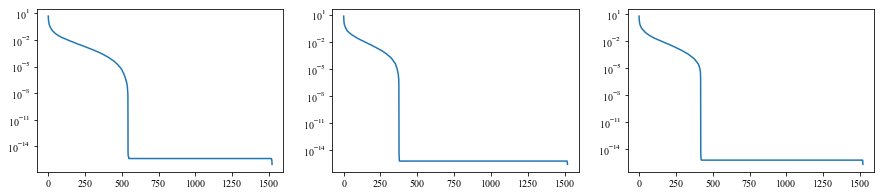

In [16]:
plt.rcParams["font.family"] = "Times New Roman"
from matplotlib import rc
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
# axes[0].semilogy(np.arange(x_train.shape[1]), S)
axes[0].semilogy(np.arange(x_train_Al.shape[1]), S_Al)
axes[1].semilogy(np.arange(x_train_Mg.shape[1]), S_Mg)
axes[2].semilogy(np.arange(x_train_Zn.shape[1]), S_Zn)
##################################################################################################################
for S_it in (S_Al, S_Mg, S_Zn):
    sum_of_S = np.sum(S_it)
    PERCENT = 99
    for i in range(S_it.shape[0]):
        if np.sum(S_it[:i]) > PERCENT/100*sum_of_S:
            break
    print('PCS Dimensionality Reduction')
    print(i, f'principal components are needed to represent {PERCENT}% of the total variation')
    print(f'The percentage reduction in dimension is: {(S_it.shape[0]-i)/S_it.shape[0]*100}%')


# fig, axes = plt.subplots(1, 4, figsize=(20, 3))
# axes[0].semilogy(np.arange(x_train.shape[1]), S)
# axes[1].semilogy(np.arange(x_train_Al.shape[1]), S_Al)
# axes[2].semilogy(np.arange(x_train_Mg.shape[1]), S_Mg)
# axes[3].semilogy(np.arange(x_train_Zn.shape[1]), S_Zn)
# ##################################################################################################################
# for S_it in (S, S_Al, S_Mg, S_Zn):
#     sum_of_S = np.sum(S_it)
#     PERCENT = 99
#     for i in range(S_it.shape[0]):
#         if np.sum(S_it[:i]) > PERCENT/100*sum_of_S:
#             break
#     print('PCS Dimensionality Reduction')
#     print(i, f'principal components are needed to represent {PERCENT}% of the total variation')
#     print(f'The percentage reduction in dimension is: {(S_it.shape[0]-i)/S_it.shape[0]*100}%')


In [17]:
NUM_FEATURES_1 = 42
NUM_FEATURES_2 = 250

In [18]:
x_train = x_train[:,:NUM_FEATURES_1]
x_test = x_test[:,:NUM_FEATURES_1]

In [19]:
x_train, y_train = x_train - mu_x, y_train - mean_y

x_train_Al, y_train_Al = (x_train_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_train_Al - mean_y_Al
x_test_Al, y_test_Al = (x_test_Al - mu_x_Al).dot(U_Al[:,:NUM_FEATURES_2]), y_test_Al - mean_y_Al

x_train_Mg, y_train_Mg = (x_train_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_train_Mg - mean_y_Mg
x_test_Mg, y_test_Mg = (x_test_Mg - mu_x_Mg).dot(U_Mg[:,:NUM_FEATURES_2]), y_test_Mg - mean_y_Mg

x_train_Zn, y_train_Zn = (x_train_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_train_Zn - mean_y_Zn
x_test_Zn, y_test_Zn = (x_test_Zn - mu_x_Zn).dot(U_Zn[:,:NUM_FEATURES_2]), y_test_Zn - mean_y_Zn

In [20]:
lamd = 0.0001
lamd_Al = 0.1
lamd_Mg = 0.1
lamd_Zn = 0.1

theta = np.dot(np.linalg.inv(np.dot(x_train.T, x_train) + lamd * np.identity(NUM_FEATURES_1)),
               x_train.T).dot(y_train)

theta_Al = np.dot(np.linalg.inv(np.dot(x_train_Al.T, x_train_Al) + lamd_Al * np.identity(NUM_FEATURES_2)),
                  x_train_Al.T).dot(y_train_Al)

theta_Mg = np.dot(np.linalg.inv(np.dot(x_train_Mg.T, x_train_Mg) + lamd_Mg * np.identity(NUM_FEATURES_2)),
                  x_train_Mg.T).dot(y_train_Mg)

theta_Zn = np.dot(np.linalg.inv(np.dot(x_train_Zn.T, x_train_Zn) + lamd_Zn * np.identity(NUM_FEATURES_2)),
                  x_train_Zn.T).dot(y_train_Zn)

In [21]:
theta

array([-2.74804216e-02, -2.20023253e-02,  1.99084971e-02, -8.31664522e-05,
        2.46089638e-03,  3.97589251e-02,  2.51897550e-03,  1.82574866e-02,
       -1.02520387e-02,  3.91944342e-03,  1.45192538e-02, -3.02714633e-02,
       -3.32112345e-03,  3.05647267e-03, -2.13125671e-03,  7.75963507e-03,
       -2.91377570e-03, -2.44996032e-03, -9.47153361e-03,  2.65338510e-03,
       -1.08515857e-03,  7.77886783e-03,  4.79923510e-03, -4.67479697e-03,
        6.26054934e-03,  4.35682362e-03, -2.06132820e-03,  1.02220928e-03,
       -1.05031512e-04, -9.47322220e-03,  8.58474790e-03,  4.72573846e-03,
       -9.13401524e-04, -2.11588037e-03, -1.47956231e-02,  4.51441845e-03,
        3.54375379e-03,  3.85376036e-03,  2.75241938e-03, -2.88488091e-03,
       -5.26930844e-03, -1.99574285e-03])

In [22]:
def pred_e0_ls(row):
    if row['migration_atom'] == 'Al':
        return (np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Al).dot(U_Al[:, :NUM_FEATURES_2]))+
               np.inner(theta_Al,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Al).dot(U_Al[:, :NUM_FEATURES_2])))/2  + mean_y_Al
    elif row['migration_atom'] == 'Mg':
        return (np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Mg).dot(U_Mg[:, :NUM_FEATURES_2]))+
               np.inner(theta_Mg,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Mg).dot(U_Mg[:, :NUM_FEATURES_2])))/2 + mean_y_Mg
    elif row['migration_atom'] == 'Zn':
        return (np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_forward']) - mu_x_Zn).dot(U_Zn[:, :NUM_FEATURES_2]))+
               np.inner(theta_Zn,
                        (np.asarray(row['one_hot_encode_backward']) - mu_x_Zn).dot(U_Zn[:, :NUM_FEATURES_2])))/2  + mean_y_Zn
    else:
        raise RuntimeError('Unknown element')
        
def pred_de_ls(row):
    return np.inner(theta, (np.asarray(row['bond_change_encode_forward'])- mu_x)[:NUM_FEATURES_1]) + mean_y

        
def pred_barrier_ls(row):
    return row['predicted_e0'] + 0.5*(row['predicted_de'])
                                                                                                               

df['predicted_e0'] = df.apply(lambda row: pred_e0_ls(row), axis=1)
df_train['predicted_e0'] = df_train.apply(lambda row: pred_e0_ls(row), axis=1)
df_test['predicted_e0'] = df_test.apply(lambda row: pred_e0_ls(row), axis=1)

df['predicted_de'] = df.apply(lambda row: pred_de_ls(row), axis=1)
df_train['predicted_de'] = df_train.apply(lambda row: pred_de_ls(row), axis=1)
df_test['predicted_de'] = df_test.apply(lambda row: pred_de_ls(row), axis=1)


df['predicted_barrier'] = df['predicted_e0'] + 0.5*df['predicted_de']
df_train['predicted_barrier'] = df_train['predicted_e0'] + 0.5*df_train['predicted_de']
df_test['predicted_barrier'] = df_test['predicted_e0'] + 0.5*df_test['predicted_de']

In [23]:
df

,index,migration_atom,migration_barriers,energy_difference,e0,energy_start,energy_end,one_hot_encode_forward,one_hot_encode_backward,energy_encode_start,energy_encode_end,bond_change_encode_forward,bond_change_encode_backward,predicted_e0,predicted_de,predicted_barrier
1720,860,Mg,0.357523,0.107305,0.303870,-918.050627,-917.943322,"[0.75, 0.25, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0, 0.0...","[0.75, 0.25, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0, 0.0...","[1360.0, 142.0, 0.0, 22.0, 0.0, 0.0, 677.0, 75...","[1360.0, 141.0, 0.0, 23.0, 0.0, 0.0, 677.0, 77...","[0.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0,...","[0.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0, -2.0, 0.0...",0.303648,0.092943,0.350120
952,476,Mg,0.507319,0.071214,0.471712,-918.239852,-918.168638,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0, 0.0, ...","[1358.0, 148.0, 0.0, 18.0, 0.0, 0.0, 690.0, 48...","[1358.0, 145.0, 0.0, 21.0, 0.0, 0.0, 690.0, 51...","[0.0, -3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 3.0, 0.0,...","[0.0, 3.0, 0.0, -3.0, 0.0, 0.0, 0.0, -3.0, 0.0...",0.510562,0.118157,0.569641
850,425,Al,0.599848,-0.057632,0.628664,-918.059446,-918.117078,"[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 1.0, 0.0, 0...","[0.5, 0.25, 0.25, 0.5, 0.25, 0.25, 1.0, 0.0, 0...","[1362.0, 59.0, 89.0, 3.0, 5.0, 6.0, 696.0, 18....","[1363.0, 60.0, 87.0, 3.0, 5.0, 6.0, 693.0, 19....","[1.0, 1.0, -2.0, 0.0, 0.0, 0.0, -3.0, 1.0, 2.0...","[-1.0, -1.0, 2.0, 0.0, 0.0, 0.0, 3.0, -1.0, -2...",0.630799,-0.077005,0.592296
639,319,Zn,0.219129,-0.068946,0.253602,-846.676136,-846.745082,"[0.25, 0.25, 0.5, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[0.25, 0.25, 0.5, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0...","[1122.0, 98.0, 176.0, 19.0, 75.0, 34.0, 559.0,...","[1122.0, 98.0, 172.0, 19.0, 79.0, 34.0, 559.0,...","[0.0, 0.0, -4.0, 0.0, 4.0, 0.0, 0.0, 0.0, 1.0,...","[0.0, 0.0, 4.0, 0.0, -4.0, 0.0, 0.0, 0.0, -1.0...",0.255861,-0.098338,0.206692
1240,620,Zn,0.307175,0.116130,0.249110,-834.887374,-834.771244,"[0.0, 0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0, ...","[0.0, 0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 1.0, ...","[1084.0, 121.0, 171.0, 52.0, 68.0, 28.0, 535.0...","[1084.0, 121.0, 170.0, 52.0, 68.0, 29.0, 535.0...","[0.0, 0.0, -1.0, 0.0, 0.0, 1.0, 0.0, 0.0, -2.0...","[0.0, 0.0, 1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 2.0,...",0.240918,0.103715,0.292776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,521,Al,0.467309,-0.088628,0.511623,-918.442900,-918.531529,"[0.5, 0.25, 0.25, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0...","[0.5, 0.25, 0.25, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0...","[1362.0, 67.0, 81.0, 3.0, 9.0, 2.0, 696.0, 21....","[1363.0, 67.0, 80.0, 3.0, 9.0, 2.0, 693.0, 23....","[1.0, 0.0, -1.0, 0.0, 0.0, 0.0, -3.0, 2.0, 1.0...","[-1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 3.0, -2.0, -1....",0.495674,-0.007036,0.492156
1745,872,Al,0.666170,-0.131351,0.731846,-917.754356,-917.885707,"[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[0.5, 0.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, ...","[1360.0, 141.0, 0.0, 23.0, 0.0, 0.0, 673.0, 83...","[1358.0, 143.0, 0.0, 23.0, 0.0, 0.0, 678.0, 78...","[-2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 5.0, -5.0, 0.0...","[2.0, -2.0, 0.0, 0.0, 0.0, 0.0, -5.0, 5.0, 0.0...",0.750929,-0.064801,0.718529
771,385,Mg,0.352731,-0.103925,0.404694,-920.580851,-920.684776,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 146.0, 0.0, 16.0, 0.0, 0.0, 696.0, 45...","[1362.0, 148.0, 0.0, 14.0, 0.0, 0.0, 696.0, 45...","[0.0, 2.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.411024,-0.074284,0.373882
843,421,Mg,0.442385,-0.029557,0.457163,-919.122024,-919.151581,"[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[1362.0, 88.0, 58.0, 4.0, 10.0, 2.0, 696.0, 27...","[1362.0, 90.0, 58.0, 4.0, 8.0, 2.0, 696.0, 27....","[0.0, 2.0, 0.0, 0.0, -2.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, -2.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0,...",0.466302,-0.053916,0.439343


rmse train 0.06784443169803642 0.5957200442608048
rmse test 0.06330631968659033 0.6266911939120416


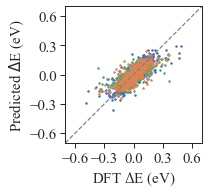

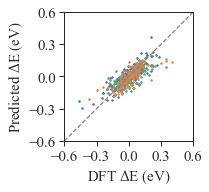

In [24]:
ele_list = ['Zn', 'Mg', 'Al']

sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })
lim_range = [-0.7, 0.7]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, legend_out=True, hue='migration_atom', hue_order=ele_list,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\Delta$E (eV)')
for ax in g.axes.flat:
#     ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT $\mathregular{\Delta E}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.6, 0.9, 0.3), yticks=np.arange(-0.6, 0.9, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_train.png', dpi=1000, transparent=True)

print('rmse train',
      np.sqrt(mean_squared_error(df_train['energy_difference'], df_train['predicted_de'])),
      r2_score(df_train['energy_difference'], df_train['predicted_de']))
###################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [-0.6, 0.6]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, legend_out=True, hue='migration_atom', hue_order=ele_list,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'energy_difference', 'predicted_de', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{\Delta E}$ (eV)')
for ax in g.axes.flat:
#     ax.set_title('Bond counting model (Testing)')
    ax.set_xlabel(xlabel='DFT $\mathregular{\Delta E}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(-0.6, 0.9, 0.3), yticks=np.arange(-0.6, 0.9, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('ediff_pred_test.png', dpi=1000, transparent=True)

print('rmse test', 
      np.sqrt(mean_squared_error(df_test['energy_difference'], df_test['predicted_de'])),
      r2_score(df_test['energy_difference'], df_test['predicted_de']))

rmse train 0.01692596701195595 0.9904362575784682
rmse test 0.03460273904415913 0.955604900686857


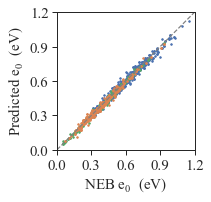

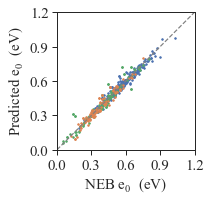

In [25]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, hue='migration_atom', legend_out=True,
                  hue_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{e_0}$  (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{e_0}$  (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Training)', size=20)

g.savefig('e0_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['e0'], df_train['predicted_e0'])),
     r2_score(df_train['e0'], df_train['predicted_e0']))
###########################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test,  hue='migration_atom', legend_out=True,
                  hue_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'e0', 'predicted_e0', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{e_0}$  (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{e_0}$  (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
# g.fig.suptitle('One hot encoding with PCA method (Testing)', size=20)

g.savefig('e0_pred_test.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['e0'], df_test['predicted_e0'])),
     r2_score(df_test['e0'], df_test['predicted_e0']))

rmse train 0.037541063537733586 0.95687648844344
rmse test 0.047503324600453825 0.9228199374154356


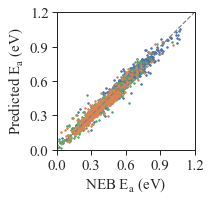

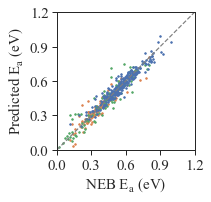

In [26]:
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_train, hue='migration_atom', legend_out=True,
                  hue_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=6,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{E_a}$ (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{E_a}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('', size=20)

g.savefig('barrier_pred_train.png', dpi=1000, transparent=True)

print('rmse train', np.sqrt(mean_squared_error(df_train['migration_barriers'], df_train['predicted_barrier'])),
                 r2_score(df_train['migration_barriers'], df_train['predicted_barrier']))
##################################################################################################################
sns.set(font='Times New Roman', style='ticks')
sns.set_style({'xtick.major.size': 8, 'ytick.major.size': 8})
sns.set_context('paper', rc={'font.size': 12, 'axes.titlesize': 15, 'axes.labelsize': 15,
                             'xtick.labelsize': 15, 'ytick.labelsize': 15, })

lim_range = [0, 1.2]
ele_list = ['Al', 'Mg', 'Zn']
palette = {'Al': 'C0', 'Zn': 'C1', 'Mg': 'C2'}

g = sns.FacetGrid(df_test, hue='migration_atom', legend_out=True,
                  col_order=ele_list, margin_titles=False,
                  ylim=lim_range, xlim=lim_range, palette=palette)
g = g.map_dataframe(plt.scatter, 'migration_barriers', 'predicted_barrier', alpha=1, s=3, marker='8')
# g = g.add_legend(loc='upper center', bbox_to_anchor=(0.96, .75), markerscale=3,
#                  scatterpoints=1, label_order=ele_list, prop={'size': 12})
# g._legend.set_title('Migration Atom', prop={'size': 15})

g.axes[0, 0].set_ylabel('Predicted $\mathregular{E_a}$ (eV)')
for ax in g.axes.flat:
    ax.set_title('')
    ax.set_xlabel(xlabel='NEB $\mathregular{E_a}$ (eV)')
    ax.plot(np.linspace(lim_range[0], lim_range[1], num=1000), np.linspace(lim_range[0], lim_range[1], num=1000),
            color='grey', ls='--')
    ax.set(xticks=np.arange(0, 1.5, 0.3), yticks=np.arange(0, 1.5, 0.3))
    ax.set_aspect('equal', 'box')
g.despine(top=False, right=False)
g.set_titles(' ')
g.fig.suptitle('', size=20)

g.savefig('barrier_pred_test.png', dpi=1000, transparent=True)

print('rmse test', np.sqrt(mean_squared_error(df_test['migration_barriers'], df_test['predicted_barrier'])),
           r2_score(df_test['migration_barriers'], df_test['predicted_barrier']))

In [27]:
js_dist = {
    'Al' : {'transform_matrix' :  U_Al[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Al.tolist(), 'mean_y': mean_y_Al.tolist(), 'theta': theta_Al.tolist()},
    'Mg' : {'transform_matrix' :  U_Mg[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Mg.tolist(), 'mean_y': mean_y_Mg.tolist(), 'theta': theta_Mg.tolist()},
    'Zn' : {'transform_matrix' :  U_Zn[:, :NUM_FEATURES_2].T.tolist(), 'mu_x' : mu_x_Zn.tolist(), 'mean_y': mean_y_Zn.tolist(), 'theta': theta_Zn.tolist()},
    'Bond' : {'theta' : theta.tolist()}}
with open('kmc_parameters.json', 'w') as outfile:
    json.dump(js_dist, outfile)

<AxesSubplot:xlabel='migration_barriers', ylabel='Count'>

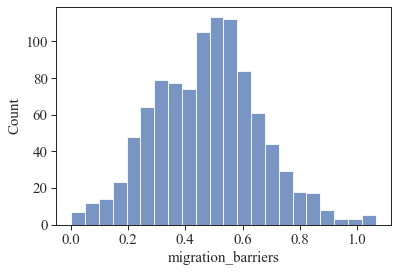

In [28]:
sns.histplot(data = df[:1000], x='migration_barriers')

<AxesSubplot:xlabel='migration_barriers', ylabel='Count'>

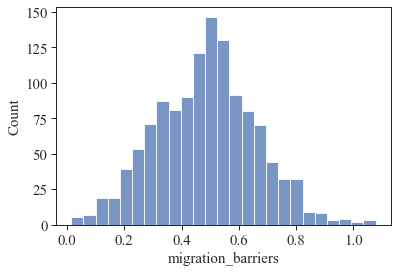

In [29]:
sns.histplot(data = df[1000:2260], x='migration_barriers')